# Logistic Regression

Logistic regression is used for classificatin problems.  The model is given by a sigmoid function:

$f(X_i) = \frac{1}{1+e^{\theta_0x_0+\theta_1x_1+...}}$

The prediction of logistic regression is interpreted as the probability of the sample belonging to the class $y_i$ given the features $X_i$:

$ \text{P}(y_i | X_i) = f(X_i)$

We must choose a threshold at which to consider sample $X_i$ as belonging to class $y_i$.  Typically we set this threshold at a 50% probability, but this can change based on the circumstances.

To ensure that the cost function is a convex bowl, the cost function for logistic regression is given by:

$J(\Theta) = \frac{1}{n}\sum_{i=1}^n \left\{\begin{aligned}
&-\log(f(x_i)) &&: y_i = 1\\
&-\log(1-f(x_i)) &&: y_i = 0
\end{aligned}
\right.$

This is equivalent to:

$J(\Theta) = \frac{1}{n}\sum_{i=1}^n \left[ 
-y_i\log\left(f(x_i)\right)-(1-y_i)\log\left(1-f(x_i)\right) \right]$

With this cost function, if we predict y=1 when y=1, the cost is zero.  If we predict y=0, when y=1, the cost blows up to infinity (and vice verse for y=0 samples).  Note that this cost function can also be derived with maximum likelihood estimation.

We use gradient descent to minimize this, which ends up having the same update rule as linear regression (with a different model for $f(x_i)$):

$\theta_j = \theta_j - \alpha\sum_{i=1}^n(f(x_i)-y_i)x_i^j$

Note that it's possible to train a logistic regression model to classify more than one class.  In this case, we take a "one versus all" approach.  Train a classifier for each class that predicts the probability of the sample being in that class or not being in that class.  Then, for predicting new samples, run each classifier and choose the class that has the highest probability.

In [97]:
#Generate some data
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x = np.random.normal(10,size=30)
y = np.random.normal(10,size=30)
label = np.ones(30)

x2 = np.random.normal(0,size=30)
y2 = np.random.normal(0,size=30)
label2 = np.zeros(30)

x=np.concatenate([x,x2])
y=np.concatenate([y,y2])
labels=np.concatenate([label,label2])


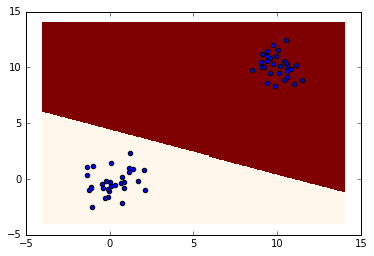

In [98]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model.fit(np.stack([x,y],axis=1),labels)

xx = yy= np.linspace(-4,14,200)
X,Y = np.meshgrid(xx,yy)
Z = model.predict(np.stack([X.flatten(),Y.flatten()],axis=1))
Z = Z.reshape(X.shape)

plt.pcolormesh(X,Y,Z,cmap=plt.cm.OrRd)
plt.scatter(x,y)

# Support Vector Machines

# Random Forests

# Naive Bayes Classifiers

# Dealing with unbalanced classes

If the classes that we are predicting are very unbalanced, it can complicate the machine learning process.  For instance, if the algorithm predicts the majority class all of the time it can be fairly accurate, but completely useless.  If this is the case, there are three metrics that are more useful for evaluating the classifier's performance:

The **precision** of our classifier is the fraction of samples it correctly identified as positive out of all of the samples that it identified as positive:

$ \text{P} = \frac{\text{number of true positives}}{\text{number of true positive + number of false positives}} $

The **recall** of our classifier is the fraction of samples that were correctly identified as positive out of the total number of positive samples.

$ \text{R} = \frac{ \text{number of true positives}}{\text{number of true positive + number of false negatives} }$

When tuning a classifier, we often trade off precision for recall, or vice versa.  Which metric you prefer will depend on the model you are developing, but if both high precision and high recall are desired, a popular way to combine them is with the **F1 score**:

$\text{F1} = 2 \frac{P*R}{P+R}$


The classes imbalance also plays a role when training a model. Depending on the machine learning algorithm, the model may want to predict the majority class all of the time.  For instance, in a Naive Bayes Classifier, if the probability of the minority class appearing is extremely small, the probability of a document belonging to that class, regardless of the features, will also be small.  To combat this, we typically try to balance the classes in our training set.  There are two methods to do so:

1) Undersample the majority class.  This means every time we put in a minority sample into our training set, we put exactly one majority sample in the set as well.

2) Oversample the minority class.  This means every time we put a minority sample into our training set, we use multiple copies of it.  This is useful when we have very little data and do not want to throw out any of the positive class.  However, it may give too much weight to features in the copied samples, which can be avoided with the undersampling method described above.

It's worth trying undersampling and oversampling in your model, and testing the result on your CV set.  Note that the final CV and test sets should include an accurate ratio of positive and negative classes, so that they reflect how the classifier will perform on a random set.

# Evaluating a classifier: https://www.youtube.com/watch?v=OAl6eAyP-yo

ROC plots show the false postive rate (x-axis) versus the true positive rate (y-axis) of a classifier.  The curve is drawn by scanning over a range of threshold, and is used to visualize the effect of changing the classifier's threshold.

The area under the ROC curve is known as the **area under the curve** (AUC), and tells you how well the classifier separates classes.  A strong classifier will have a high AUC, reflecting an ROC that hugs the upper left corner.  A classifier that is no better than a coin flip with have a linear, diagonal ROC.
